In [1]:
from typing import Callable,List
from scipy.misc import derivative
import matplotlib.pyplot as plt
import scipy
import numpy as np
from scipy import optimize
from mpl_toolkits.mplot3d import Axes3D

In [2]:
def Function(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 -7)**2

In [3]:
r_min = -5
r_max = 5
tol = 10**(-2)

In [4]:
def Plot_Func(r_min: float, r_max: float,func: Callable[..., float])-> None:
    """
    Функция постоения графика функции 
    :param float r_min: Граничные условия функции  
    :param float r_max: Граничные условия функции
    :param Callable[..., float] func: Заданная функция
    :return Axes3DSubplot: Параметры посторения графика
    """ 
    xaxis = np.arange(r_min, r_max, 0.1)
    yaxis = np.arange(r_min, r_max, 0.1)
    
    x, y = np.meshgrid(xaxis, yaxis)
    results = func(x, y)
    figure = plt.figure()
    axis = figure.gca(projection='3d')
    axis.plot_surface(x, y, results, cmap='jet',alpha=0.5)
    axis.set_xlabel('X')
    axis.set_ylabel('Y')
    fig, ax = plt.subplots(1, 2)
    
    ax[0].contour(x, y, results, 50 , cmap='jet',alpha=0.7)
    ax[1].contourf(x, y, results, 50 , cmap='jet',alpha=0.7)
    #axis.set_zlabel('Z')
    return axis, fig, ax

# Методы нулевого порядка


## Первый метод 
## Покоординатного спуска

In [5]:
def Coordinate_Descent_Method(r_min: float, r_max: float, tol: float, func: Callable[..., float]) -> float:
    """
    Функция нахождения экстремума функции методом покоординатного спуска
    :param float r_min: Граничные условия функции  
    :param float r_max: Граничные условия функции
    :param float tol: Необходимая точность решения
    :param Callable[..., float] func: Заданная функция
    :return float: Значение экстремума функции
    """ 
    i=0
    x0 = (r_min+r_max) / 2
    y0 = (r_min+r_max) / 2
    axis, fig, ax = Plot_Func(r_min = r_min, r_max = r_max, func=func)
    axis.scatter(x0,y0,func(x0,y0),linewidth=2.0,color= 'Green')
    ax[0].scatter(x0,y0, linewidth = 1,color= 'green')
    ax[1].scatter(x0,y0, linewidth = 1,color= 'Green')
    print('Начальная точка')
    plt.show()
    while True:
        i+=1
        a,b = r_min, r_max
        while True:
            x1 = b - (b-a) / 1.618
            x2 = a + (b-a) / 1.618
            z1 = func(x1,y0)
            z2 = func(x2,y0)
            if z1 >= z2:
                a = x1
            else:
                b = x2
            if abs(b-a) < tol:
                x0 = (a+b) / 2
                break
        #axis, fig, ax = Plot_Func(r_min = r_min, r_max = r_max, func=func)
        #axis.scatter(x0,y0,z,linewidth=2.0,color= 'Green')
        #ax[0].scatter(x0,y0,z, linewidth = 2,color= 'green')
        #ax[1].scatter(x0,y0,z, linewidth = 2,color= 'Green')
        #print(f'{i} Итерация по X')
        #plt.show()
        a,b = r_min, r_max
        while True:
            y1 = b - (b-a) / 1.618
            y2 = a + (b-a) / 1.618
            z1 = func(x0,y1)
            z2 = func(x0,y2)
            if z1 >= z2:
                a = y1
            else:
                b = y2
            if abs(b-a) < tol:
                y0 = (a+b) / 2
                break
        if (abs(func(x1,y1)-func(x0,y0))) <= tol:
            break
        axis, fig, ax = Plot_Func(r_min = r_min, r_max = r_max, func=func)
        axis.scatter(x0,y0,func(x0,y0),linewidth = 2.0 ,color= 'Green')
        ax[0].scatter(x0,y0, linewidth = 1.0 ,color= 'green')
        ax[1].scatter(x0,y0, linewidth = 1.0 ,color= 'Green')
        print(f'{i} Итерация')
        #print(f'{i} Итерация по Y')
        plt.show()
    print(f'{i} Итерация')
    print("Расчет окончен")
    axis, fig, ax = Plot_Func(r_min = r_min, r_max = r_max, func=func)
    axis.scatter(x0,y0,func(x0,y0),linewidth=2.0,color= 'red')
    ax[1].scatter(x0,y0, linewidth = 1.0 ,color= 'red',alpha=1)
    ax[0].scatter(x0,y0, linewidth = 1.0 ,color= 'red',alpha=1)
    plt.show()
    return x0,y0,func(x0,y0)

C:\Temp\ipykernel_9780\2468990196.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


Начальная точка


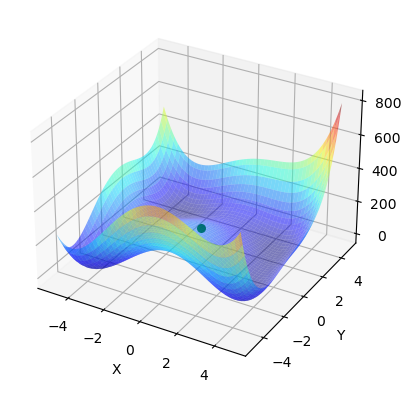

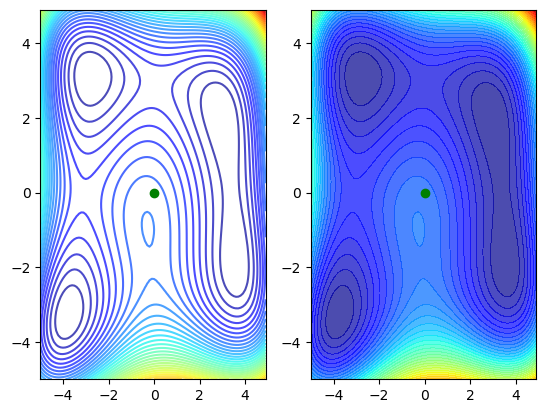

1 Итерация


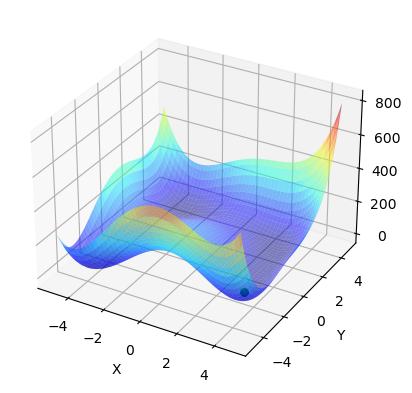

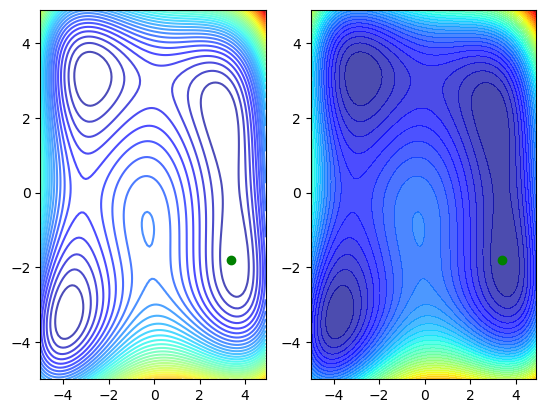

2 Итерация
Расчет окончен


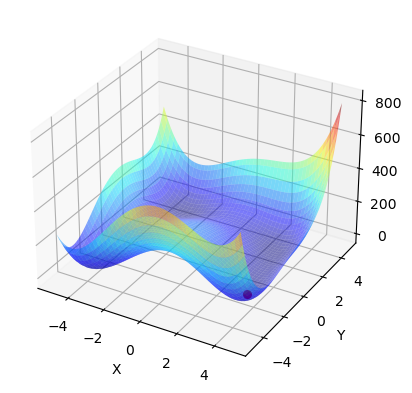

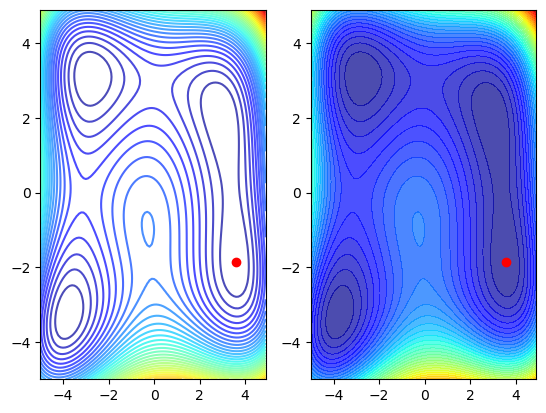

(3.5801986923593905, -1.8462866224040617, 0.0009317912733854454)

In [6]:
Coordinate_Descent_Method(r_min=r_min, r_max=r_max, tol=tol, func=Function)


## Второй метод 
## Метод Нелдера-Мида

In [7]:
def Nelder_Mead_Method(r_min: float, r_max: float, tol: float, func: Callable[..., float]) -> float:
    """
    Функция нахождения экстремума функции методом покоординатного спуска
    :param float r_min: Граничные условия функции  
    :param float r_max: Граничные условия функции
    :param float tol: Необходимая точность решения
    :param Callable[..., float] func: Заданная функция
    :return float: Значение экстремума функции
    """ 
    alpha=1 
    beta=0.5 
    gamma=2
    v1 = np.array([0, 0])
    v2 = np.array([1.0, 0])
    v3 = np.array([0, 1])
    axis, fig, ax = Plot_Func(r_min = r_min, r_max = r_max, func=func)
    axis.plot([v1[0],v2[0],v3[0],v1[0]],[v1[1],v2[1],v3[1],v1[1]],[func(v1[0],v1[1]),func(v2[0],v2[1]),func(v3[0],v3[1]),func(v1[0],v1[1])],linewidth=2.0,color= 'Green')        
    ax[0].plot([v1[0],v2[0],v3[0],v1[0]],[v1[1],v2[1],v3[1],v1[1]],linewidth=2.0,color= 'Green')        
    ax[1].plot([v1[0],v2[0],v3[0],v1[0]],[v1[1],v2[1],v3[1],v1[1]],linewidth=2.0,color= 'Green')        
    
    print('Начальное положение ')
    plt.show()
    i=1
    while True:
        adict = {tuple(list(v1)):func(v1[0],v1[1]), tuple(list(v2)):func(v2[0],v2[1]), tuple(list(v3)):func(v3[0],v3[1])}
        points = sorted(adict.items(), key=lambda x: x[1])
        b = np.array(points[0][0])
        g = np.array(points[1][0])
        w = np.array(points[2][0])
        mid = (g + b)/2
        xr = mid + alpha * (mid - w)
        if func(xr[0],xr[1]) < func(g[0],g[1]):
            w = xr
        else:
            if func(xr[0],xr[1]) < func(w[0],w[1]):
                w = xr
            c = (w + mid)/2
            if func(c[0],c[1]) < func(w[0],w[1]):
                w = c
        if func(xr[0],xr[1]) < func(b[0],b[1]):
            xe = mid + gamma * (xr - mid)
            if func(xe[0],xe[1]) < func(xr[0],xr[1]):
                w = xe
            else:
                w = xr
        if func(xr[0],xr[1]) > func(g[0],g[1]):

            xc = mid + beta * (w - mid)
            if func(xc[0],xc[1]) < func(w[0],w[1]):
                w = xc
        if abs(w-v1)[0] <= tol:
            axis, fig, ax = Plot_Func(r_min = r_min, r_max = r_max, func=func)
            
            ax[0].plot([v1[0],v2[0],v3[0],v1[0]],[v1[1],v2[1],v3[1],v1[1]],linewidth=2.0,color= 'red')        
            ax[1].plot([v1[0],v2[0],v3[0],v1[0]],[v1[1],v2[1],v3[1],v1[1]],linewidth=2.0,color= 'red')        
    
            axis.plot([w[0],g[0],b[0],w[0]],[w[1],g[1],b[1],w[1]],[func(w[0],w[1]),func(g[0],g[1]),func(b[0],b[1]),func(w[0],w[1])],linewidth=2.0,color= 'red')        
            print(f'{i} Итерация')
            print("Расчет окончен")
            plt.show()
            v1 = w
            v2 = g
            v3 = b
            break
        axis, fig, ax = Plot_Func(r_min = r_min, r_max = r_max, func=func)
        ax[0].plot([v1[0],v2[0],v3[0],v1[0]],[v1[1],v2[1],v3[1],v1[1]],linewidth=2.0,color= 'Green')        
        ax[1].plot([v1[0],v2[0],v3[0],v1[0]],[v1[1],v2[1],v3[1],v1[1]],linewidth=2.0,color= 'Green')        
        axis.plot([w[0],g[0],b[0],w[0]],[w[1],g[1],b[1],w[1]],[func(w[0],w[1]),func(g[0],g[1]),func(b[0],b[1]),func(w[0],w[1])],linewidth=2.0,color= 'Green')        
        print(f'{i} Итерация')
        i+=1
        plt.show()
        v1 = w
        v2 = g
        v3 = b
    
    return list(b)

C:\Temp\ipykernel_9780\2468990196.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


Начальное положение 


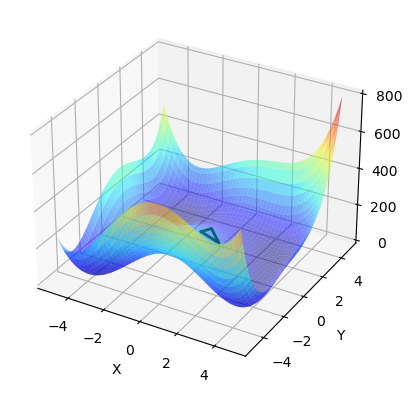

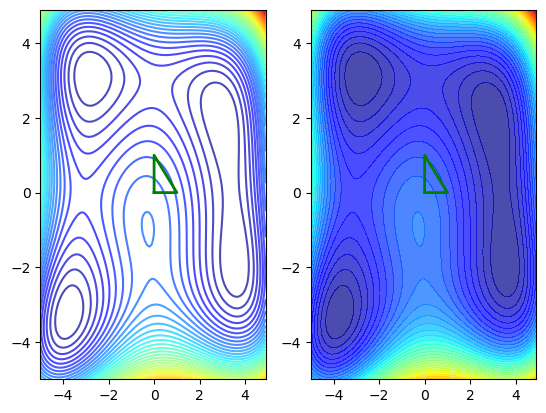

1 Итерация


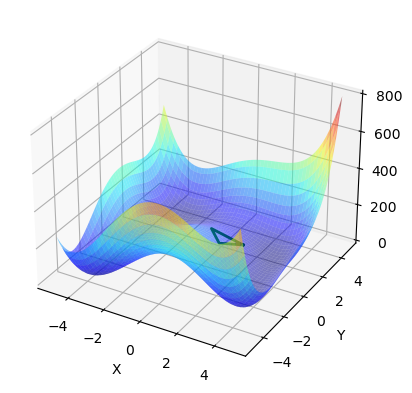

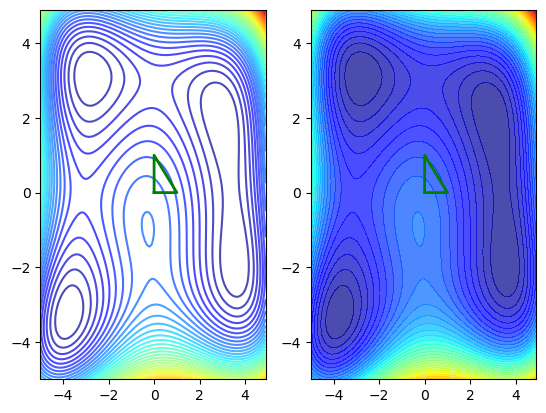

2 Итерация


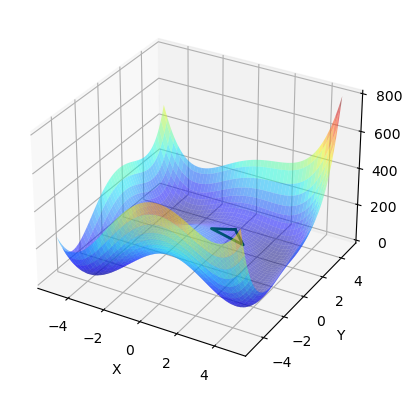

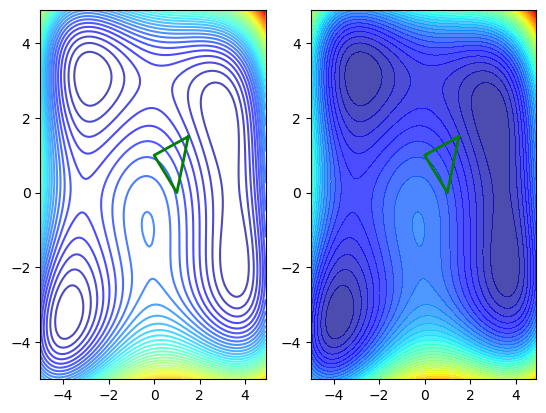

3 Итерация


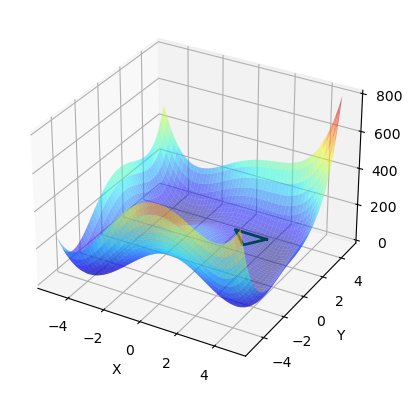

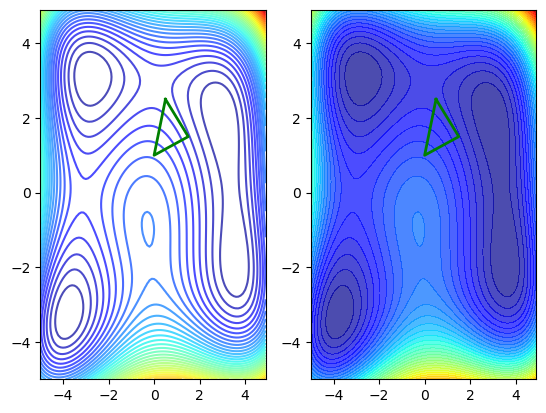

4 Итерация


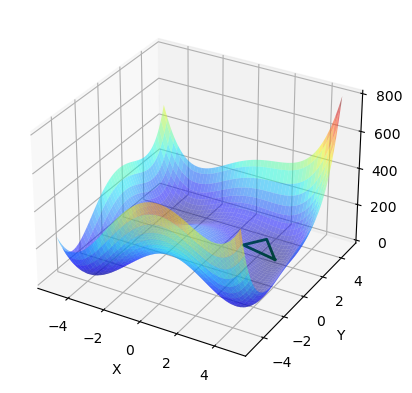

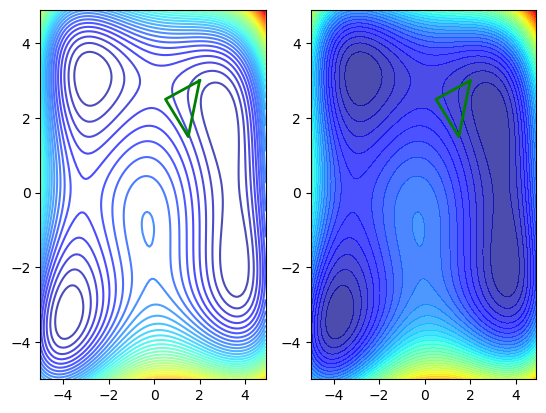

5 Итерация


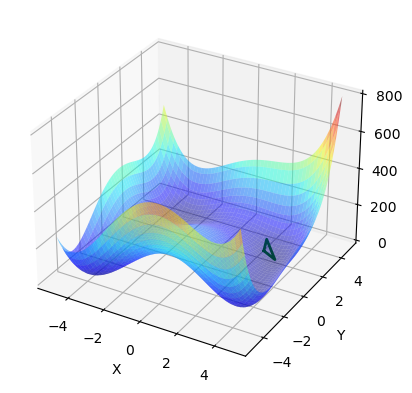

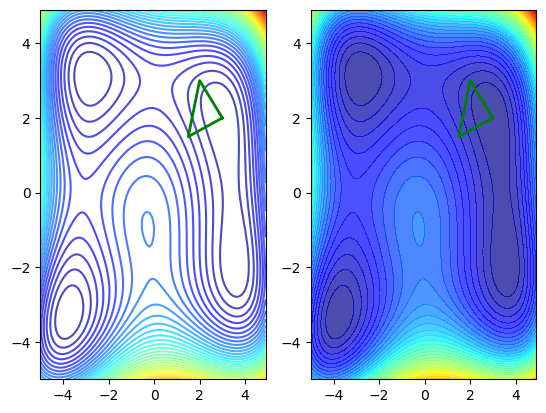

6 Итерация


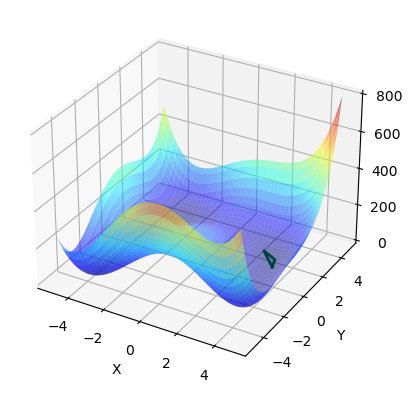

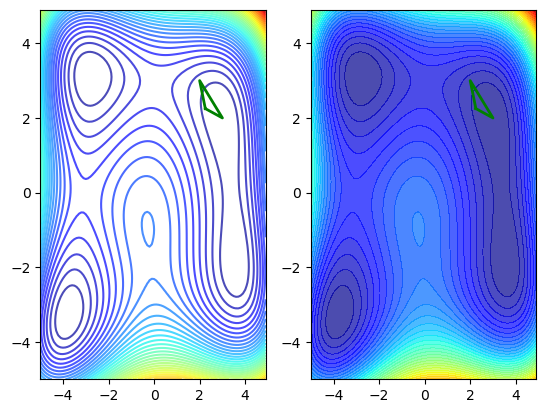

7 Итерация


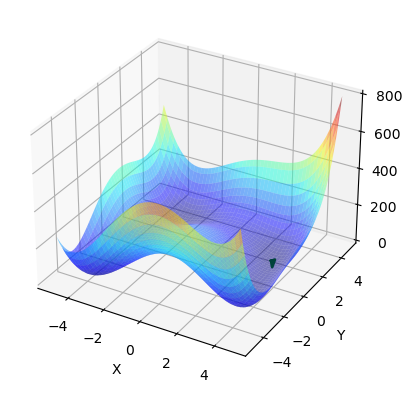

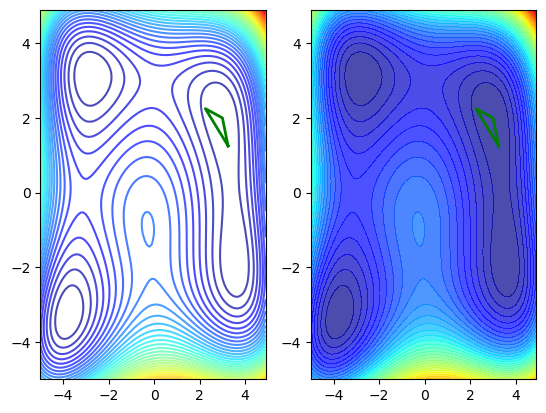

8 Итерация


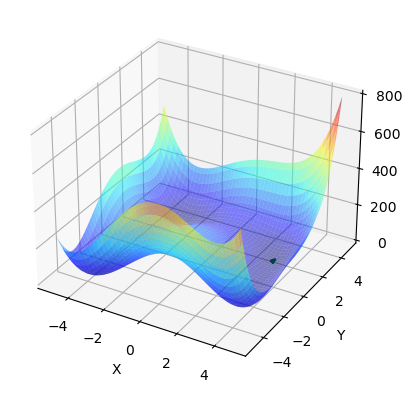

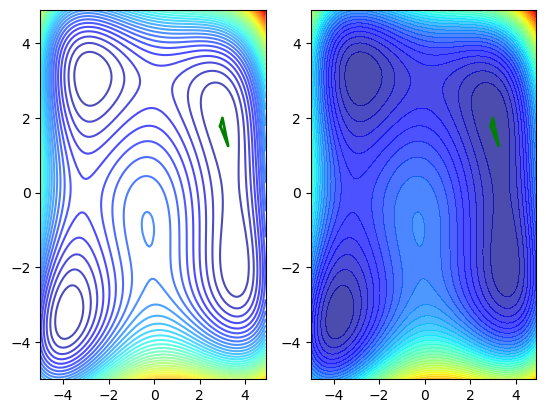

9 Итерация


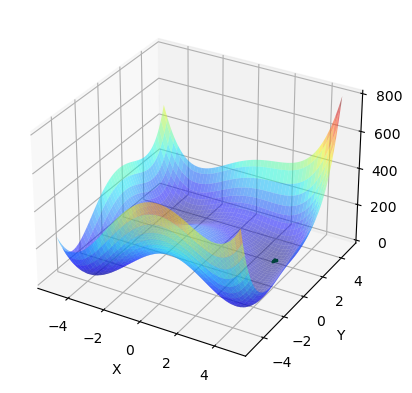

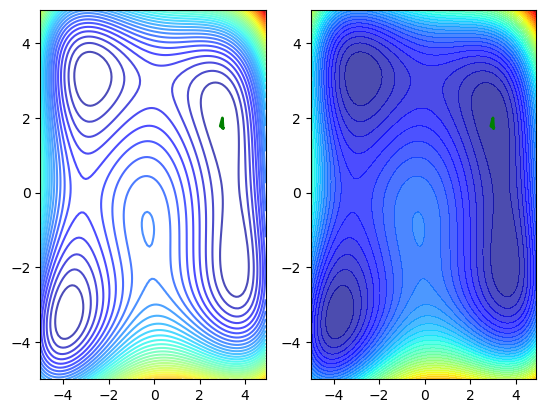

10 Итерация


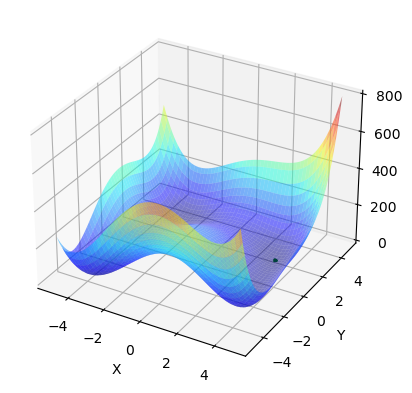

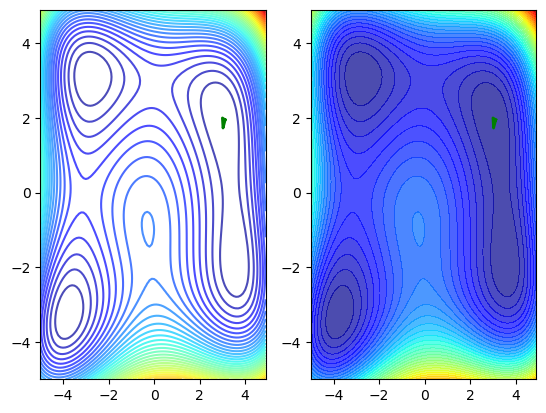

11 Итерация


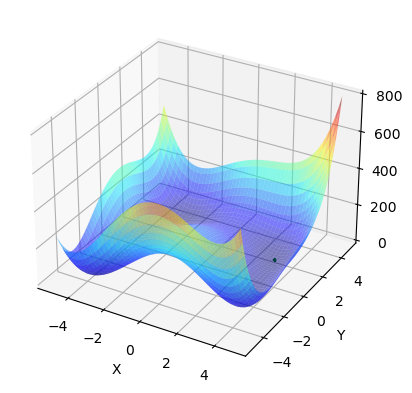

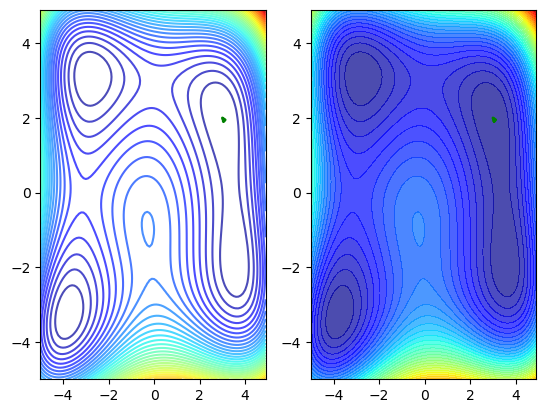

12 Итерация


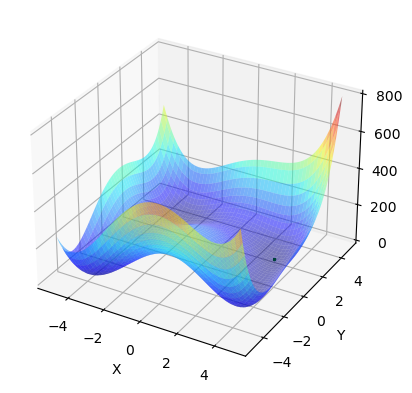

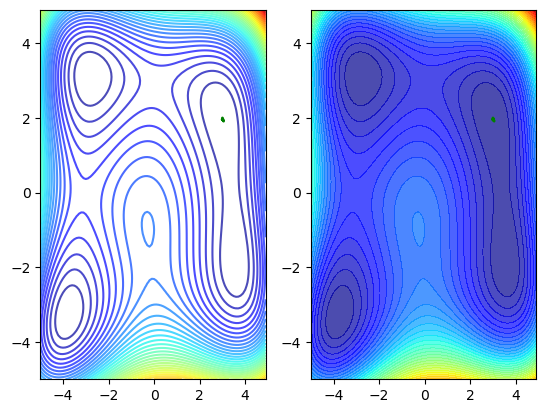

13 Итерация
Расчет окончен


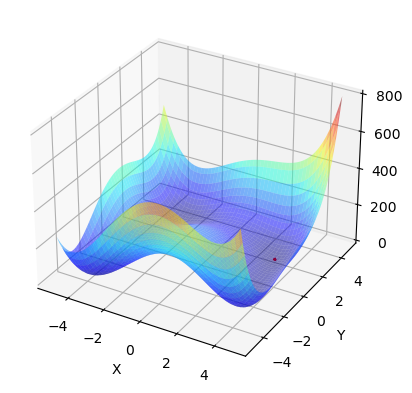

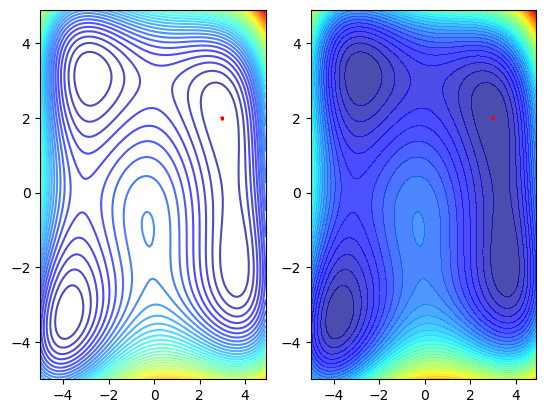

[3.0, 2.0]

In [8]:
Nelder_Mead_Method(r_min=r_min, r_max=r_max, tol=tol, func=Function)

# Методы первого порядка


## Первый метод 
## Метод градиентного спуска

In [15]:
def Gradient_Method(r_min: float, r_max: float, tol: float, func: Callable[..., float]) -> float:
    """
    Функция нахождения экстремума функции методом покоординатного спуска
    :param float r_min: Граничные условия функции  
    :param float r_max: Граничные условия функции
    :param float tol: Необходимая точность решения
    :param Callable[..., float] func: Заданная функция
    :return float: Значение экстремума функции
    """               
    global_epsilon = 0.000000001                
    centre = (global_epsilon, global_epsilon) 
    arr_shape = 100
    step = r_max/ arr_shape
    
    def rotate_vector(length, a):
        return length * np.cos(a), length * np.sin(a)


    def derivative_x(epsilon, arg):
        return (func(global_epsilon + epsilon, arg) -
                func(epsilon, arg)) / global_epsilon


    def derivative_y(epsilon, arg):
        return (func(arg, epsilon + global_epsilon) -
                func(arg, epsilon)) / global_epsilon


    def calculate_flip_points():
        flip_points = np.array([0, 0])
        points = np.zeros((360, arr_shape), dtype=bool)
        cx, cy = centre

        for i in range(arr_shape):
            for alpha in range(360):
                x, y = rotate_vector(step, alpha)
                x = x * i + cx
                y = y * i + cy
                points[alpha][i] = derivative_x(x, y) + derivative_y(y, x) > 0
                if not points[alpha][i - 1] and points[alpha][i]:
                    flip_points = np.vstack((flip_points, np.array([alpha, i - 1])))
                
        return flip_points


    def pick_estimates(positions):
        vx, vy = rotate_vector(step, positions[1][0])
        cx, cy = centre
        best_x, best_y = cx + vx * positions[1][1], cy + vy * positions[1][1]

        for index in range(2, len(positions)):
            vx, vy = rotate_vector(step, positions[index][0])
            x, y = cx + vx * positions[index][1], cy + vy * positions[index][1]
            if func(best_x, best_y) > func(x, y):
                best_x = x
                best_y = y

        for index in range(360):
            vx, vy = rotate_vector(step, index)
            x, y = cx + vx * (arr_shape - 1), cy + vy * (arr_shape - 1)
            if func(best_x, best_y) > func(x, y):
                best_x = x
                best_y = y

        return best_x, best_y


    def gradient_descent(best_estimates, is_x):
        derivative = derivative_x if is_x else derivative_y
        best_x, best_y = best_estimates
        descent_step = step
        value = derivative(best_y, best_x)
        
        while abs(value) > global_epsilon:
            descent_step *= 0.95
            best_y = best_y - descent_step \
                if derivative(best_y, best_x) > 0 else best_y + descent_step
            value = derivative(best_y, best_x)

        return best_y, best_x
    x,y = gradient_descent(gradient_descent(pick_estimates(calculate_flip_points()), False), True)
    #print(f'{i} Итерация')
    print("Расчет окончен")
    axis, fig, ax = Plot_Func(r_min = r_min, r_max = r_max, func=func)
    axis.scatter(x,y,func(x,y),linewidth=2.0,color= 'red')
    ax[1].scatter(x,y, linewidth = 1.0 ,color= 'red',alpha=1)
    ax[0].scatter(x,y, linewidth = 1.0 ,color= 'red',alpha=1)
    plt.show()

    return x,y


Расчет окончен


C:\Temp\ipykernel_9780\2468990196.py:15: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  axis = figure.gca(projection='3d')


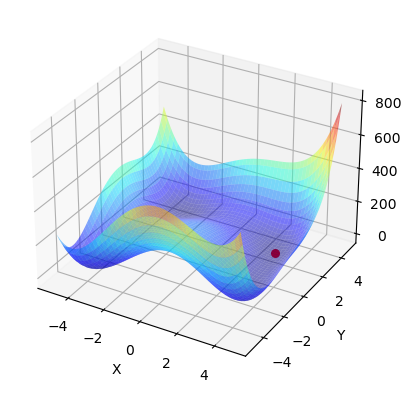

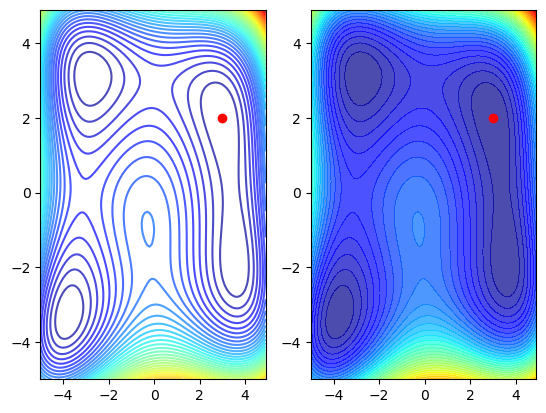

(3.0005098748129466, 1.9981128297059179)

In [16]:
Gradient_Method(r_min=r_min, r_max=r_max, tol=tol, func=Function)